### Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).<br>
2) Please include your Name and UNI below.

### Name: Xinyu Li
### UNI: xl3228

##Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Part 1: Neural Network from the scratch
For this part, you are not allowed to use any library other than numpy.

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each
parameter wrt to the loss) with the network image uploaded.

The weight matrix for the hidden layer is W1 and has bias b1.

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is sigmoid for both hidden and output layer

Loss function is the MSE loss

Refer to the below dictionary for dimensions for each matrix


In [2]:
np.random.seed(0) # don't change this
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [3]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)

    Z2 = np.dot(H, weights['W2']) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [5]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)
    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    dLdW1 = np.dot(X.T, dLdZ1)
    dLdb1 = np.dot(ones.T, dLdZ1)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [6]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [7]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

# Part 2: Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

In [8]:
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### 2.1 Plot 50 samples from each class/label from train set on a 10*5 subplot

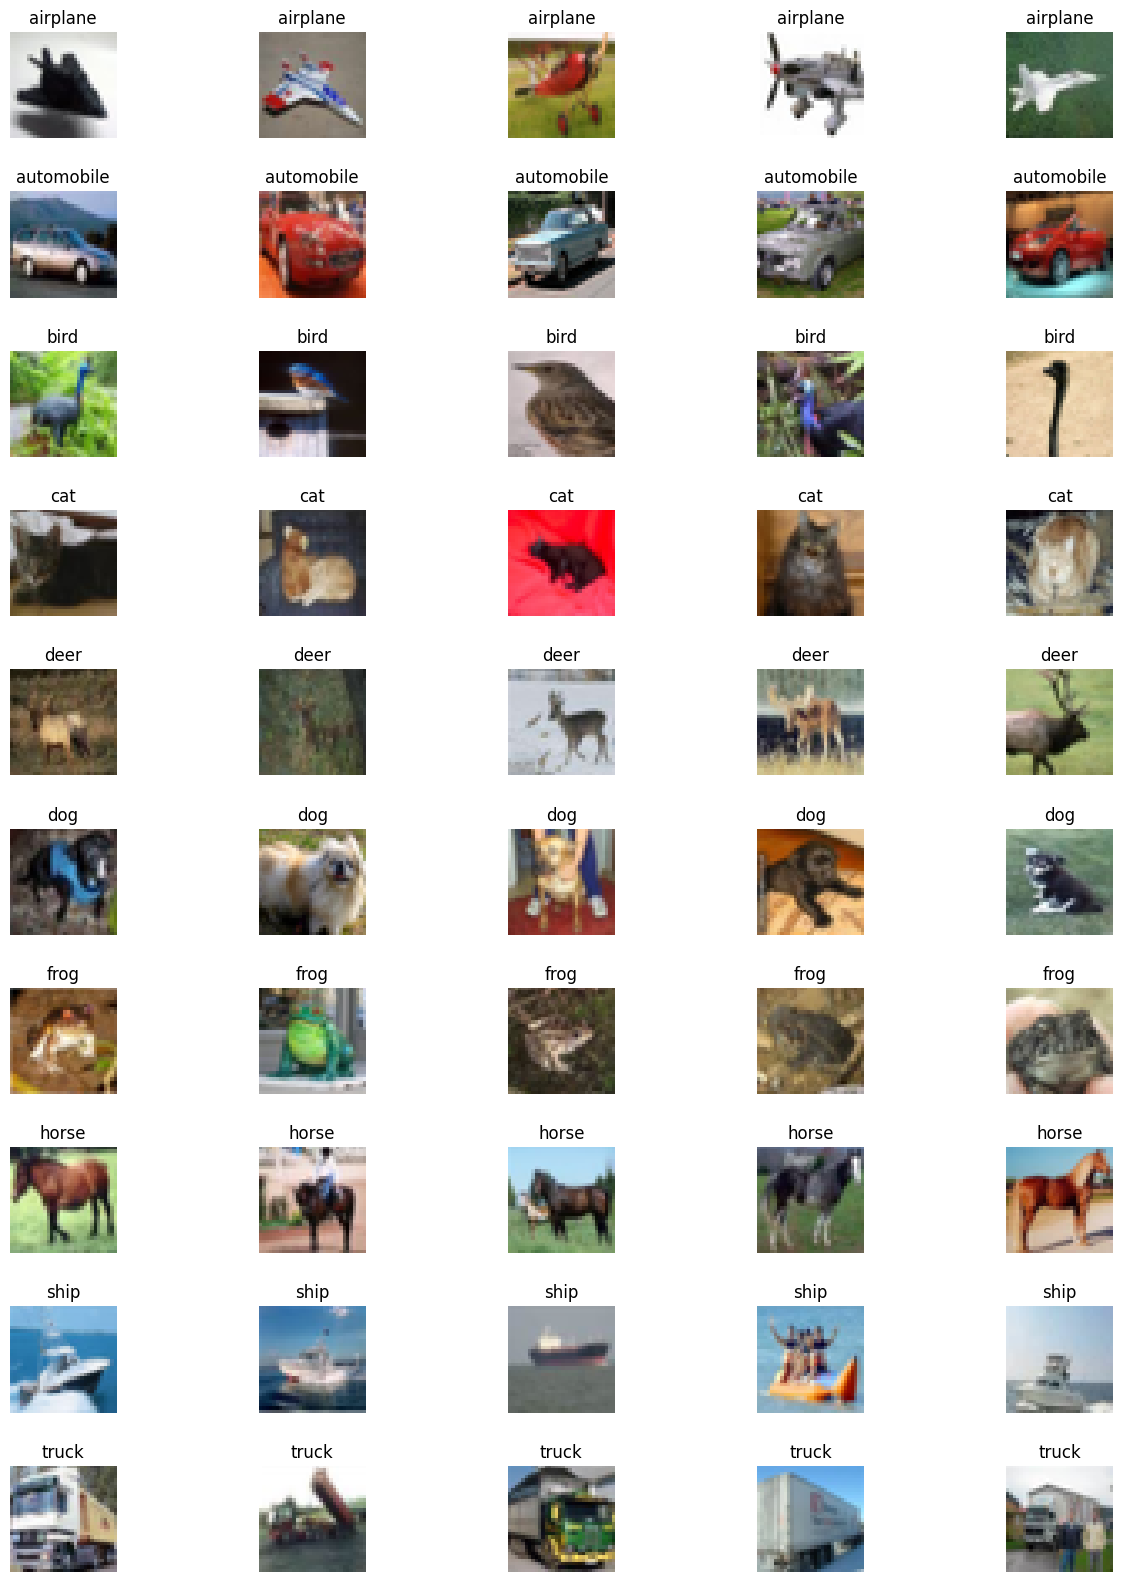

In [9]:
#Your code here
samples_per_class = 5
num_classes = 10
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(15, 20))
for class_label in range(num_classes):
    indices = np.where(y_dev == class_label)[0][:samples_per_class]
    for i, index in enumerate(indices):
        axes[class_label, i].imshow(x_dev[index])
        axes[class_label, i].axis('off')
        axes[class_label, i].set_title(LABELS[class_label])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

###2.2 Preparing the dataset for NN

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

3) Standardize the development and test sets.

4) Train-test split your development set into train and validation sets (8:2 ratio).

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

In [10]:
#Your code here
xdev_shape = x_dev.shape
ydev_shape = y_dev.shape
xtest_shape = x_test.shape
ytest_shape = y_test.shape
print(f"Shape of x_dev: {xdev_shape}")
print(f"Shape of y_dev: {ydev_shape}")
print(f"Shape of x_test: {xtest_shape}")
print(f"Shape of y_test: {ytest_shape}")

Shape of x_dev: (50000, 32, 32, 3)
Shape of y_dev: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

In [11]:
flat_xdev = x_dev.reshape(x_dev.shape[0],-1)
flat_xdev_shape = flat_xdev.shape
flat_xtest = x_test.reshape(x_test.shape[0],-1)
flat_xtest_shape = flat_xtest.shape
print(f"Shape of flattened x_dev: {flat_xdev_shape}")
print(f"Shape of flattened x_test: {flat_xtest_shape}")

Shape of flattened x_dev: (50000, 3072)
Shape of flattened x_test: (10000, 3072)


4) Train-test split your development set into train and validation sets (8:2 ratio).

In [12]:
flat_xtrain, flat_xval, y_train, y_val = train_test_split(flat_xdev, y_dev, test_size=0.2, random_state=42)

3) Standardize the development and test sets.
  - Since the case is in the wording of image processing, min-max scalar is more appropriate.
  - fit_transform flat_xtrain using the MinMaxScaler()
  - transofrm validation and test dataset using fitted MinMaxScaler() to avoid data leakage from train to validation and test dataset.

In [13]:
scaler = MinMaxScaler()
flat_xtrain = scaler.fit_transform(flat_xtrain)
flat_xval = scaler.transform(flat_xval)
flat_xtest = scaler.transform(flat_xtest)

### 2.3 Build the feed forward network with the below specifications

First layer size = 128

hidden layer size = 64

last layer size = Figure this out from the data!

In [14]:
#Your code here
model = Sequential()
model.add(Dense(128, input_shape=(3072,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

###2.4 Print out the model summary. Mention the number of parameters for each layer.

In [15]:
#Your code here
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###2.5 Do you think the number of parameters is dependent on the image height and width?

- Your comments here
  - Yes, greater height or width will lead to more number of parameters in the first layer.
  - In this case, each image is of size (32 * 32 * 3)
    - 32x32: This corresponds to the height pixel and width pixel of each image in the dataset. Each image is a 32x32 pixel grid.
    - 3: This represents the number of color channels. In typical image datasets, there will be three color channels: red, green, and blue (RGB). Each channel provides information about the intensity of a particular color.
  - The amount of parameters to be estimated based on the height pixel h and width pixel w are calculated as followings:
    - first layer: (h * w * 3 + 1) * 128
    - second layer: (128 + 1) * 64
    - Third layer: (64 + 1) * 10
    - sum of all above, we got the total amount of parameters will be: 384 * h * w + 9034
    - Thus, greater height or width wil lead to more parameters.

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output equal to 1 upto two decimal places?**

In [16]:
#modify name of X_train based on your requirement
model.compile()
output = model.predict(flat_xtrain[0].reshape(1,-1))
print("Output: {:.2f}".format(sum(output[0])))

1/1 [==============================] - 0s 105ms/step
Output: 1.00


###2.6 Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs.

In [17]:
#Your code here
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(flat_xtrain, y_train, epochs=20, validation_data=(flat_xval, y_val))

Epoch 1/20
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8993 - accuracy: 0.3138 - val_loss: 1.7821 - val_accuracy: 0.3524
Epoch 2/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7315 - accuracy: 0.3799 - val_loss: 1.6958 - val_accuracy: 0.3931
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6553 - accuracy: 0.4071 - val_loss: 1.6300 - val_accuracy: 0.4091
Epoch 4/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6041 - accuracy: 0.4249 - val_loss: 1.6505 - val_accuracy: 0.4111
Epoch 5/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5683 - accuracy: 0.4419 - val_loss: 1.5955 - val_accuracy: 0.4231
Epoch 6/20
1250/1250 [==============================] - 9s 8ms/step - loss: 1.5399 - accuracy: 0.4501 - val_loss: 1.5854 - val_accuracy: 0.4233
Epoch 7/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5170 - accuracy: 0.4602 - val_loss: 1.5368 - val_accu

###2.7 Plot the training curves described below

###2.7.1 Display the train vs validation loss over each epoch


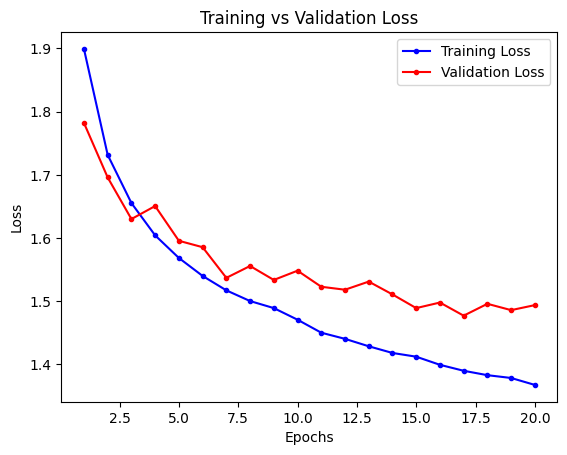

In [18]:
# Extracting the training and validation loss from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b.-', label='Training Loss')
plt.plot(epochs, val_loss, 'r.-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###2.7.2 Display the train vs validation accuracy over each epoch

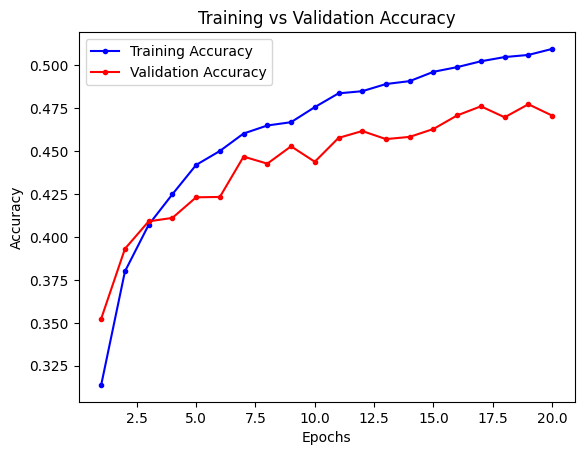

In [19]:
#Your code here
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b.-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r.-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 2.8 Finally, report the metric chosen on test set

In [20]:
#Your code here
test_loss, test_accuracy = model.evaluate(flat_xtest, y_test)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.4865 - accuracy: 0.4718
Test Accuracy: 0.4717999994754791


### 2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

313/313 [==============================] - 1s 3ms/step


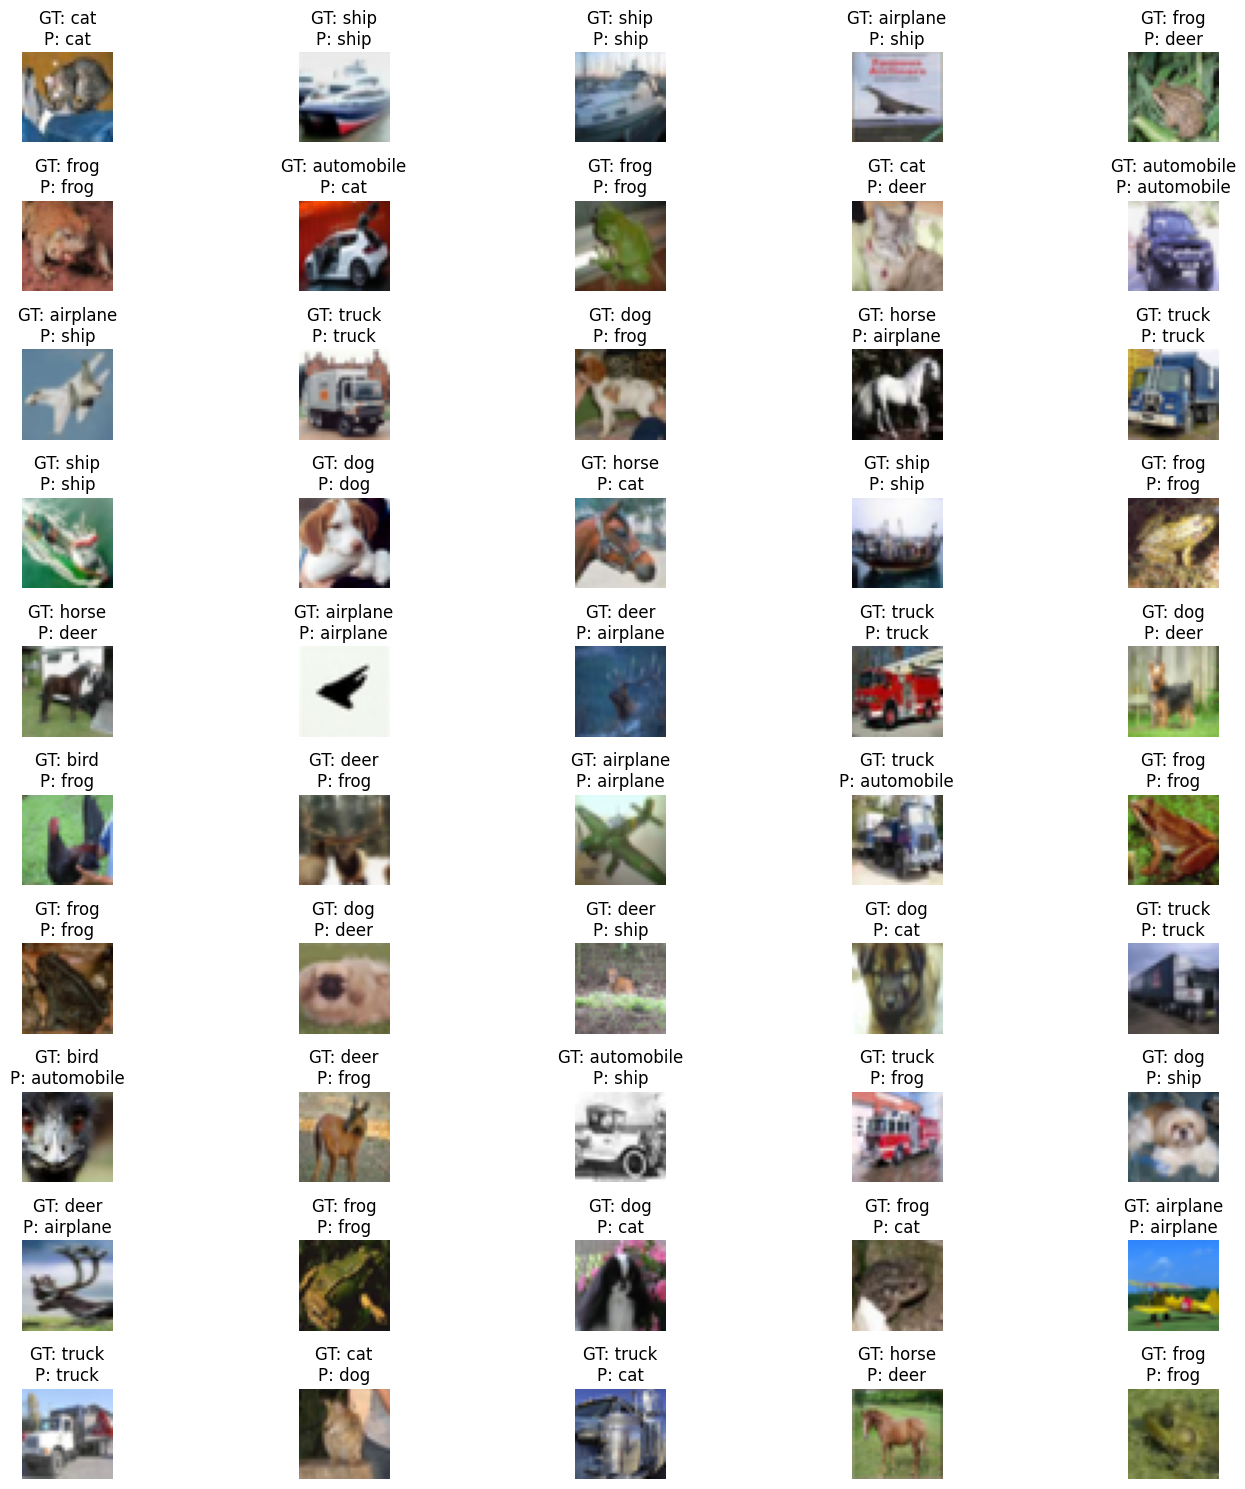

In [21]:
#Your code here
predictions = model.predict(flat_xtest)
predicted_classes = np.argmax(predictions, axis=1)
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(15, 15))
for i in range(50):
    plt.subplot(10, 5, i + 1)
    plt.imshow(np.squeeze(x_test[i]), cmap='gray')
    gt_label = LABELS[y_test[i][0]]
    predicted_label = LABELS[predicted_classes[i]]
    plt.title(f'GT: {gt_label}\nP: {predicted_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()